# Similarity & Distance Measure in a CBIR Framework

## Import Libraries

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# for all divide by zero
# invalid log operations
np.seterr(all='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

## Load Data

In [3]:
path = '../data/image.orig-10/'

In [4]:
def load_image_dir(path):
    images = []
    filenames = []
    for filename in os.listdir(path):
        filenames.append(filename)
        img = cv2.imread(os.path.join(path,filename),0)
        if img is not None:
            images.append(img)
    return images, filenames

In [5]:
images, filenames = load_image_dir(path)
print("Loaded {} images from {}".format(len(images), path))

Loaded 10 images from ../data/image.orig-10/


## Query Image

In [6]:
def display(cv_image, title='Image'):
    """Convert OpenCV images from BGR to RGB for Pyplot"""
    #plt_image = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
    plt.title(title)
    plt.imshow(cv_image, cmap='gray')
    plt.show()
    return None

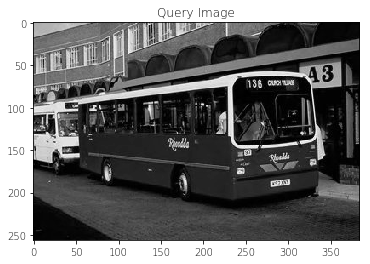

In [7]:
query = images[0]
display(query, 'Query Image')

## Similarity & Distance Measures

Various Similarity and Distance measures for a CBIR Framework

In [8]:
class Similarity():
    """Various Similarity and Distance measures for a CBIR Framework"""
    
    def __init__(self):
        return None
    
    def _sum_of_squares(self, a):
        """Square each element of the input array, and return the sum(s) of that"""
        return np.sum(a*a)

    def euclidean(self, x, y):
        """
        Euclidean Distance between two lists
        """
        return np.sum(np.abs(x - y))

    def cityblock(self, x, y):
        """
        Cityblock or Manhattan Distance between two lists
        """
        return np.sqrt(np.sum((x - y) ** 2))

    def infinity(self, x, y):
        """
        Infinity distance between two lists
        """
        return np.max([a-b for a, b in zip(x,y)])
    
    def cosine(self, x, y):
        """
        Cosine Similarity between two lists
        """
        u = np.asarray(np.ravel(x), dtype=float)
        v = np.asarray(np.ravel(y), dtype=float)
        nume = np.dot(u, v)
        deno = np.linalg.norm(u)*np.linalg.norm(u)
        dist = 1 - (nume/deno)
        return dist

    def pearson(self, x,y):
        """
        Pearson correlation coefficient between two lists
        """
        # x and y should have same length.
        x = np.asarray(np.ravel(x), dtype=float)
        y = np.asarray(np.ravel(y), dtype=float)
        n = len(x)
        mx = x.mean()
        my = y.mean()
        xm, ym = x - mx, y - my
        r_num = np.add.reduce(xm * ym)
        r_den = np.sqrt(self._sum_of_squares(xm)*self._sum_of_squares(ym))
        r = r_num / r_den
        #r = np.max(np.min(r, 1.0), -1.0)
        return r

    def chi_square(self, x, y):
        """
        Chi-Square Distance
        """
        h1 = cv2.calcHist([x],[0],None,[256],[0,256])
        h2 = cv2.calcHist([y],[0],None,[256],[0,256])
        return cv2.compareHist(h1, h2, cv2.HISTCMP_CHISQR)

    def kl_dist(self, x, y):
        """
        Kullback-Liebler Divergence Distance between two images
        """
        x = np.asarray(np.ravel(x), dtype=float)
        y = np.asarray(np.ravel(y), dtype=float)
        # to handle log 0 or
        # divide by zero cases
        div = np.where(y!=0, x/y, 0)
        dist = np.where(div!=0, x*np.log(div), 0)
        return np.sum(dist)
    
    def jeffrey(self, x, y):
        """
        Jeffrey Divergence measure
        """
        x = np.asarray(np.ravel(x), dtype=float)
        y = np.asarray(np.ravel(y), dtype=float)
        u = np.divide(np.add(x,y), 2)
        # to handle divide by zero
        xu = np.where(u!=0, x/u, 0)
        yu = np.where(u!=0, y/u, 0)
        # to handle log 0 cases
        log_xu = np.where(xu!=0, np.log(xu), 0)
        log_yu = np.where(yu!=0, np.log(yu), 0)
        dist = np.sum(x*log_xu + y*log_yu)
        return dist
    
    def ks_dist(self, x, y):
        """
        Kolmogorov- Smirnov Divergence for two images
        """
        x = np.asarray(np.ravel(x), dtype=float)
        y = np.asarray(np.ravel(y), dtype=float)
        dist = np.square(np.cumsum(x)-np.cumsum(y))
        return np.max(dist)
    
    def cvm_dist(self, x, y):
        """
        Cramer – Von Mises Divergence for two images
        """
        x = np.asarray(np.ravel(x), dtype=float)
        y = np.asarray(np.ravel(y), dtype=float)
        dist = np.square(np.cumsum(x)-np.cumsum(y))
        return np.sum(dist)
        
    def earth_movers(self, x, y):
        """
        Earth Movers Distance
        """
        x = np.asarray(np.ravel(x), dtype=float)
        y = np.asarray(np.ravel(y), dtype=float)
        return np.sum(np.cumsum(x)- np.cumsum(y))

## Results & Comparison

In [9]:
similarity_comp = pd.DataFrame(columns=['Images', 'Euclidean Distance', 'Cityblock Distance', 'Infinity Distance',
                                        'Cosine Similarity', 'Pearson Correlation Coefficient', 'Chi-Square Dissimilarity',
                                        'Kullback-Liebler Divergence', 'Jeffrey Divergence', 'Kolmogorov- Smirnov Divergence',
                                        'Cramer – Von Mises Divergence', 'Earth Movers Distance'])

In [10]:
sim = Similarity()
for img, file in zip(images, filenames):
    row = {'Images' : file,
           'Euclidean Distance': sim.euclidean(query, img),
           'Cityblock Distance': sim.cityblock(query, img),
           'Infinity Distance': sim.infinity(query, img),
           'Cosine Similarity': sim.cosine(query, img),
           'Pearson Correlation Coefficient': sim.pearson(query, img),
           'Chi-Square Dissimilarity': sim.chi_square(query, img),
           'Kullback-Liebler Divergence': sim.kl_dist(query, img),
           'Jeffrey Divergence': sim.jeffrey(query, img),
           'Kolmogorov- Smirnov Divergence': sim.ks_dist(query, img),
           'Cramer – Von Mises Divergence': sim.cvm_dist(query, img),
           'Earth Movers Distance': sim.earth_movers(query, img)}
    similarity_comp = similarity_comp.append(row, ignore_index=True)
    

In [11]:
similarity_comp

,Images,Euclidean Distance,Cityblock Distance,Infinity Distance,Cosine Similarity,Pearson Correlation Coefficient,Chi-Square Dissimilarity,Kullback-Liebler Divergence,Jeffrey Divergence,Kolmogorov- Smirnov Divergence,Cramer – Von Mises Divergence,Earth Movers Distance
0,300.jpg,0,0.000000,0,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,301.jpg,13680084,3181.158908,255,0.227365,0.175311,185024.230289,3.355840e+06,2.189994e+06,2.484520e+12,1.854995e+16,-2.829605e+10
2,302.jpg,13472553,3158.039423,255,0.262893,0.173499,25756.261909,3.525571e+06,2.198220e+06,1.322884e+12,6.454059e+16,-7.590068e+10
3,303.jpg,11726758,3191.867165,255,0.522670,-0.106657,46054.108254,8.615432e+06,2.888966e+06,9.634640e+11,3.558510e+16,5.394541e+10
4,304.jpg,12613044,3225.477639,255,0.263164,0.162181,64464.623711,3.754906e+06,2.292865e+06,3.750420e+12,1.642420e+17,-1.114289e+11
5,305.jpg,14252567,3223.856231,255,0.217993,0.025885,80220.815134,2.756201e+06,2.545416e+06,6.274709e+12,8.537032e+16,-4.239597e+10
6,306.jpg,13937234,3238.838681,255,0.122078,0.050734,408915.531988,1.898514e+06,2.791987e+06,1.206933e+13,4.714372e+17,-2.038795e+11
7,307.jpg,12928753,3205.179402,255,0.332125,-0.108650,47223.062882,3.929117e+06,2.836914e+06,3.609206e+12,6.837002e+16,-3.049914e+10
8,308.jpg,12622793,3237.048810,255,0.191932,-0.053519,65529.639855,3.108533e+06,3.169832e+06,1.080331e+13,3.368994e+17,-1.526645e+11
9,309.jpg,13339418,3239.856478,255,0.032553,0.253896,100119.267138,1.235786e+06,2.426330e+06,1.212535e+13,7.277188e+17,-2.488734e+11


## Save as Excel

In [12]:
similarity_comp.to_csv("similarity_measures_comparision.csv")

___